In [2]:
# Imports
import matplotlib.pyplot as plt
import random, pdb
import numpy as np
import tensorflow as tf
import time
import pandas as pd

#svm imports
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

#Neural net import
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

#Linear classifier
from sklearn.linear_model import LogisticRegression

# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets.samples_generator import make_classification
from mpl_toolkits.mplot3d import axes3d, Axes3D

# SYNTHETIC DATA CREATED USING Make Classification

(5000, 6)
[1 1 0 ... 2 2 0]


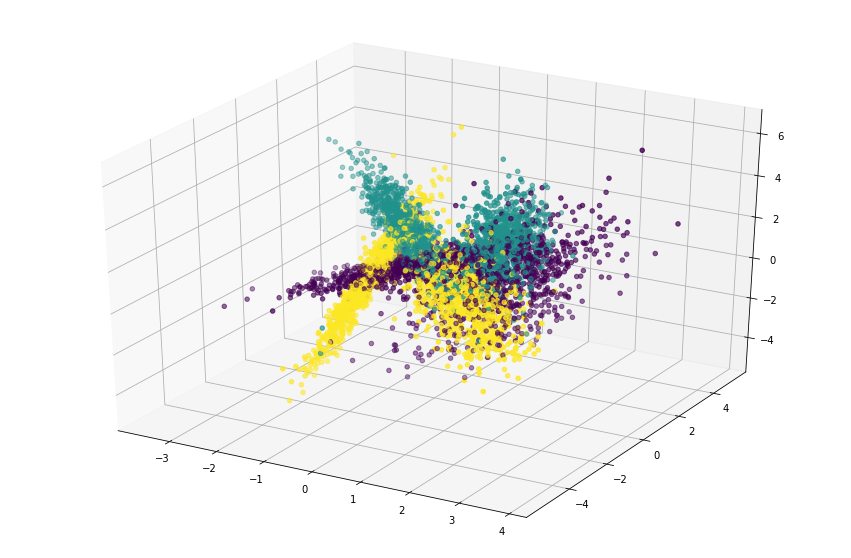

In [3]:
X,y = make_classification(n_samples=5000, n_features=6, n_informative=3, n_classes=3, random_state=0)
print(X.shape)
print(y)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Neural Net algorithm using MLP Classifier

In [3]:
## Learning rate, hidden layers & their sizes, activation function
parameters = {
    'activation': ['logistic'],
    'solver': ['sgd'],
    'max_iter': [100],
    'learning_rate_init': [0.001, 0.01, 0.1, 1],
    'hidden_layer_sizes': np.arange(4,12)
}
grid_nn = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, cv=5, return_train_score=True) # using all processors n_jobs=-1 (multicores)
grid_nn.fit(X_train, y_train)
print(grid_nn.score(X_test, y_test))
print(grid_nn.best_params_)

0.85
{'activation': 'logistic', 'hidden_layer_sizes': 10, 'learning_rate_init': 1, 'max_iter': 100, 'solver': 'sgd'}


In [4]:
df = pd.DataFrame(grid_nn.cv_results_)
df[['param_learning_rate_init','param_hidden_layer_sizes', 'mean_fit_time', 'mean_test_score']]

,param_learning_rate_init,param_hidden_layer_sizes,mean_fit_time,mean_test_score
0,0.001,4,1.617872,0.736857
1,0.01,4,1.534299,0.750286
2,0.1,4,1.530105,0.786286
3,1,4,0.799860,0.782571
4,0.001,5,1.460892,0.734571
5,0.01,5,1.461889,0.752000
6,0.1,5,1.608095,0.802857
7,1,5,1.581767,0.824286
8,0.001,6,2.190340,0.743143
9,0.01,6,1.832897,0.748857


#  SVM algorithm using SVC Classifier

In [4]:
parameters = {
    'kernel': ['rbf', 'sigmoid'],
    'C':[0.001, 0.1],
    'gamma':[10,1,0.1]
}
grid = GridSearchCV(svm.SVC(), param_grid=parameters, cv=2, n_jobs=-1, return_train_score=True)


grid.fit(X_train, y_train)
print(grid.score(X_test, y_test))
print(grid.best_params_)

0.8286666666666667
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [5]:
df = pd.DataFrame(grid.cv_results_)
df[['param_gamma','param_C', 'param_kernel', 'mean_fit_time', 'mean_test_score']]

,param_gamma,param_C,param_kernel,mean_fit_time,mean_test_score
0,10,0.001,rbf,0.206943,0.341429
1,10,0.001,sigmoid,0.296208,0.618286
2,1,0.001,rbf,0.217916,0.341429
3,1,0.001,sigmoid,0.311668,0.620857
4,0.1,0.001,rbf,0.223897,0.341429
5,0.1,0.001,sigmoid,0.226393,0.343714
6,10,0.1,rbf,0.170544,0.341429
7,10,0.1,sigmoid,0.096243,0.470571
8,1,0.1,rbf,0.152093,0.813429
9,1,0.1,sigmoid,0.129653,0.502286


# Random Forest algorithm using Random Forest Classifier

In [8]:
# Random Forests, grid search to find best parameter and run cross validation
parameters = {
    'n_estimators': [60,80,100],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)]
}
grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=2, n_jobs=-1, return_train_score=True)
grid_rfc.fit(X_train, y_train)
print(grid_rfc.score(X_test, y_test))
print(grid_rfc.best_params_)

0.8633333333333333
{'max_depth': 40, 'n_estimators': 80}


In [9]:
df = pd.DataFrame(grid_rfc.cv_results_)
df[['param_n_estimators','param_max_depth', 'mean_fit_time', 'mean_test_score']]

,param_n_estimators,param_max_depth,mean_fit_time,mean_test_score
0,60,10,0.200962,0.853429
1,80,10,0.263295,0.856286
2,100,10,0.343082,0.853143
3,60,20,0.213427,0.860000
4,80,20,0.308674,0.857429
5,100,20,0.379984,0.857714
6,60,30,0.225397,0.859143
7,80,30,0.301693,0.858571
8,100,30,0.376992,0.859429
9,60,40,0.230384,0.858000


# Logistic Regression algorithm using Logistic Regression Classifier

In [27]:
# Linear Classifier
parameters = {
    'solver': ['sag', 'lbfgs'],
    'multi_class': ['ovr']
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid=parameters, cv=2, n_jobs=-1)

lc = LogisticRegression(solver='sag', multi_class='ovr')

grid_lr.fit(X_train, y_train)
print(grid_lr.score(X_test, y_test))
print(grid_lr.best_params_)

0.7453333333333333
{'multi_class': 'ovr', 'solver': 'sag'}


### Questions and Answers

<b>Q:</b> Which method works significantly better than others? <br>
<b>A:</b> Based on the accuracy comparison of the various classifiers with other synthetic datasets, none of the classifiers works better. However, Random Forest works significantly better than others for the random classifier. Though the accuracy rate of Random Forest is ~86%, it is better than the result displayed by other classifiers. Furthermore, Neural Nets are the second classifier which has displayed good accuracy after Random Forest. Linear Regression has shown the least accuracy of 74.5%.
- Neural Nets: 85%
- Support Vector Machine: 82.88%
- Random Forest: 86.33%
- Linear Regression: 74.5%
<br><br>

<b>Q:</b> What decision boundaries that your data set requires? How does this relate to the various models’ performance?<br>
<b>A:</b> Decision boundary for random classification can vary depending on the dataset generated by the random function. Their may not be any decision boundry and data may overlay over another making it difficult to classify.<br>

<b>Support Vector Classifier</b>:
- Best config is: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


<b>Random Forest Classifier</b>:
- Best config is: {'max_depth': 40, 'n_estimators': 80}
- Max depth is 40 with forest size of 80 trees.

<b>Linear Classifier</b>:
- Best config is: {'multi_class': 'ovr', 'solver': 'sag'}

<b>Neural Network</b>:
- Best config is: {'activation': 'logistic', 'hidden_layer_sizes': 10, 'learning_rate_init': 1, 'max_iter': 100, 'solver': 'sgd'}
<br><br>